# Privacy Policy Analysis

This notebook analyzes LLM-parsed privacy policy data to understand data broker practices across three key dimensions:

## Analysis Components

### 1. **Data Use Practices** (LLM Q1)
- Marketing purposes
- Personalized advertising 
- Employment decisions
- Consumer finance
- Law enforcement (without subpoena)

### 2. **Entity Sharing Practices** (LLM Q2)  
- Government entities
- Corporations
- Educational/Research institutions

### 3. **User Rights and Controls** (LLM Q3)
- Data access rights
- Correction capabilities
- Deletion rights  
- Non-discrimination protections
- Opt-out from targeted advertising
- Opt-out option for data collection or sharing

## Methodology

For Prompts 1 and 2 (Data Use and Entity Sharing), the analysis processes LLM responses coded as:
- **0**: Explicitly not allowed
- **1**: Explicitly allowed
- **2**: Not mentioned in policy

For Prompts 3 (User Rights and Controls), the analysis processes LLM responses coded as:
- **0**: No explicit guarantee of provision
- **1**: Explicitly guarantee of provision

Core functionality has been moved to `data_utils.privacy_policy_analyzer` for better code organization and reusability.

In [1]:
"""
Privacy Policy Analysis
======================

Analysis of LLM-processed privacy policy data to understand data broker practices,
entity sharing patterns, and user rights across different privacy policies.
"""

import sys
from pathlib import Path

# Add project root to path for imports
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

# Import utility functions
from data_utils.privacy_policy_analyzer import (
    load_privacy_policy_data,
    analyze_data_use_practices, 
    analyze_sharing_entities,
    analyze_user_controls,
    create_policy_analysis_chart,
    generate_analysis_report
)

print("Privacy Policy Analysis Utilities Loaded")
print("Ready to analyze LLM-processed privacy policy data")

Privacy Policy Analysis Utilities Loaded
Ready to analyze LLM-processed privacy policy data


In [2]:
# Configuration and Data Loading
DATA_PATH = '../data/raw_data/privacy_policies/privacy-policy-scraping-final.csv'

print("Loading privacy policy analysis data...")
llm_pp = load_privacy_policy_data(DATA_PATH)

if llm_pp is not None:
    print(f"Data loaded successfully!")
    print(f"Columns available: {list(llm_pp.columns)}")
    print(f"Shape: {llm_pp.shape}")
else:
    print("Failed to load data. Please check the file path.")

Loading privacy policy analysis data...
Privacy policy data loaded successfully: 200 rows, 5 columns
Data loaded successfully!
Columns available: ['Name', 'PrivacyPolicyURL', 'LLM Q1', 'LLM Q2', 'LLM Q3']
Shape: (200, 5)


In [3]:
# Analyze Data Use Practices
print("Analyzing data use practices...")
data_use, data_use_stats = analyze_data_use_practices(llm_pp)

print("Data Use Analysis Complete")
print(f"Categories analyzed: {list(data_use_stats.keys())}")
print(f"Sample data shape: {data_use.shape}")

# Display sample of processed data
print("\nSample of processed data use data:")
display(data_use.head())

Analyzing data use practices...
Data Use Analysis Complete
Categories analyzed: ['marketing', 'personalized_ads', 'employment', 'consumer_finance', 'law_no_subpoena']
Sample data shape: (200, 6)

Sample of processed data use data:


,Name,marketing,personalized_ads,employment,consumer_finance,law_no_subpoena
0,knowertechusa,1,1,2,2,2
1,talx,1,1,1,1,1
2,projectapplecart,1,1,2,2,2
3,lotamesolutions,1,1,2,2,2
4,hexasoftdevelopmentsdnbhd,1,1,2,1,2


In [4]:
# Analyze Entity Sharing Practices  
print("Analyzing entity sharing practices...")
entities, entities_stats = analyze_sharing_entities(llm_pp)

print("Entity Sharing Analysis Complete")
print(f"Entity types analyzed: {list(entities_stats.keys())}")
print(f"Sample data shape: {entities.shape}")

# Display sample of processed data
print("\nSample of entity sharing data:")
display(entities.head())

Analyzing entity sharing practices...
Entity Sharing Analysis Complete
Entity types analyzed: ['gov', 'corporations', 'education_research']
Sample data shape: (200, 4)

Sample of entity sharing data:


,Name,gov,corporations,education_research
0,knowertechusa,2,1,2
1,talx,1,1,2
2,projectapplecart,1,1,2
3,lotamesolutions,2,1,2
4,hexasoftdevelopmentsdnbhd,2,1,2


In [5]:
# Analyze User Rights and Controls
print("Analyzing user rights and controls...")
controls, controls_stats = analyze_user_controls(llm_pp)

print("User Controls Analysis Complete")
print(f"Control types analyzed: {list(controls_stats.keys())}")
print(f"Sample data shape: {controls.shape}")

# Display sample of processed data
print("\nSample of user controls data:")
display(controls.head())

Analyzing user rights and controls...
User Controls Analysis Complete
Control types analyzed: ['access', 'correct', 'delete', 'no_discrimination', 'no_targeted_ads', 'opt_out_data']
Sample data shape: (200, 7)

Sample of user controls data:


,Name,access,correct,delete,no_discrimination,no_targeted_ads,opt_out_data
0,knowertechusa,1,0,1,1,1,1
1,talx,1,1,1,1,1,1
2,projectapplecart,0,0,0,0,0,0
3,lotamesolutions,0,0,0,0,0,1
4,hexasoftdevelopmentsdnbhd,1,1,1,1,1,1


Creating data use practices visualization...


/var/folders/td/m34p7_q516j2j6lnxf6qvm0c0000gn/T/ipykernel_75635/3988401843.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


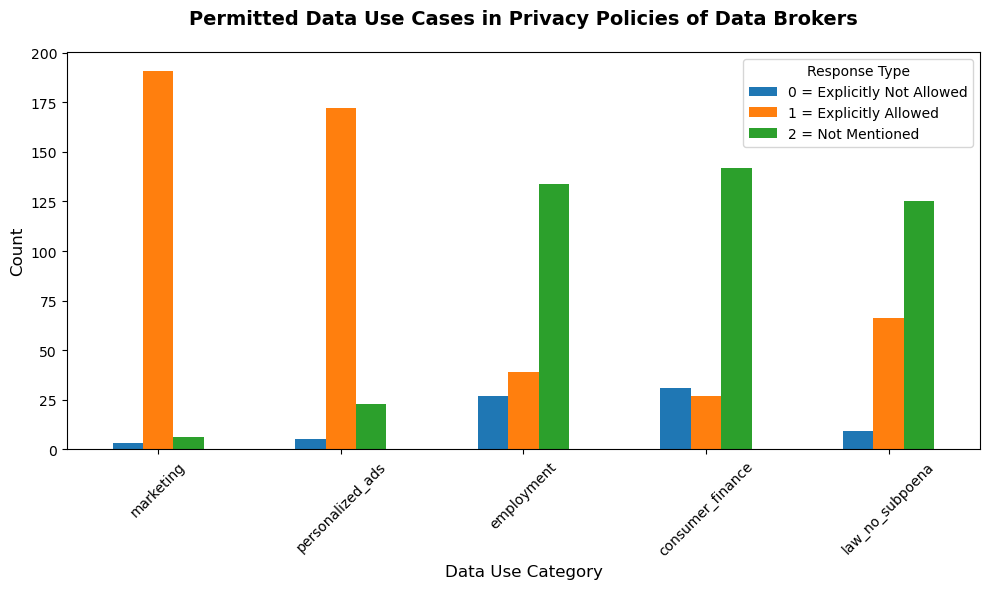

In [6]:
# Visualization 1: Data Use Practices
print("Creating data use practices visualization...")

data_use_cols = ['marketing', 'personalized_ads', 'employment', 'consumer_finance', 'law_no_subpoena']
available_cols = [col for col in data_use_cols if col in data_use.columns]

if available_cols:
    fig = create_policy_analysis_chart(
        data=data_use,
        category_columns=available_cols,
        title='Permitted Data Use Cases in Privacy Policies of Data Brokers',
        xlabel='Data Use Category',
        legend_labels=['0 = Explicitly Not Allowed', '1 = Explicitly Allowed', '2 = Not Mentioned']
    )
    fig.show()
else:
    print("No valid data use columns found for visualization")

Creating entity sharing practices visualization...


/var/folders/dc/pxjd3wtj4_v88slzx9vq15740000gn/T/ipykernel_11892/3992414135.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


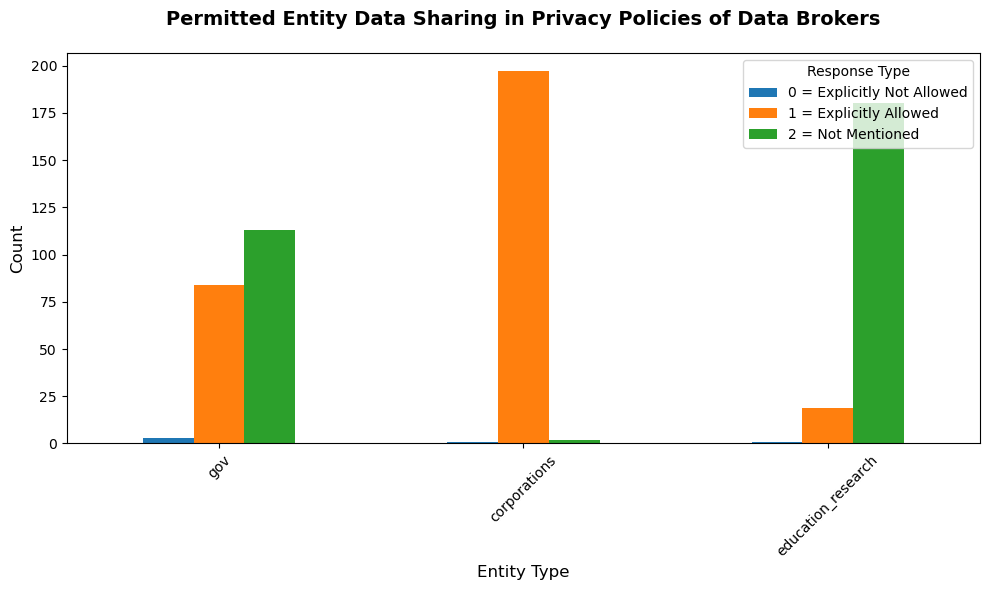

In [27]:
# Visualization 2: Entity Sharing Practices
print("Creating entity sharing practices visualization...")

entities_cols = ['gov', 'corporations', 'education_research']
available_cols = [col for col in entities_cols if col in entities.columns]

if available_cols:
    fig = create_policy_analysis_chart(
        data=entities,
        category_columns=available_cols,
        title='Permitted Entity Data Sharing in Privacy Policies of Data Brokers',
        xlabel='Entity Type',
        legend_labels=['0 = Explicitly Not Allowed', '1 = Explicitly Allowed', '2 = Not Mentioned']
    )
    fig.show()
else:
    print("No valid entity sharing columns found for visualization")

Creating user rights and controls visualization...


/var/folders/td/m34p7_q516j2j6lnxf6qvm0c0000gn/T/ipykernel_75635/2128864469.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


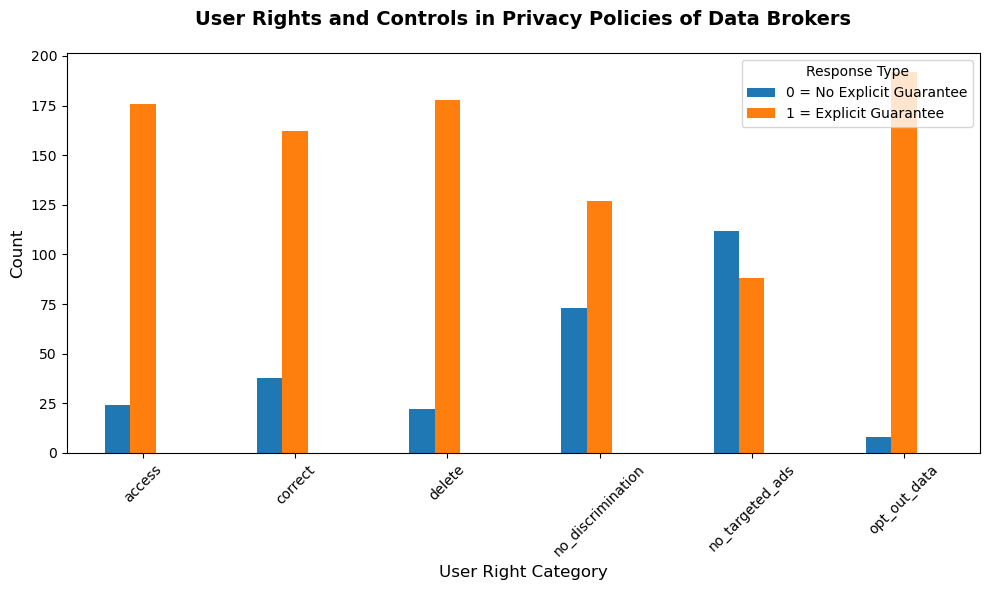

In [8]:
# Visualization 3: User Rights and Controls
print("Creating user rights and controls visualization...")

controls_cols = ['access', 'correct', 'delete', 'no_discrimination', 'no_targeted_ads', 'opt_out_data']
available_cols = [col for col in controls_cols if col in controls.columns]

if available_cols:
    fig = create_policy_analysis_chart(
        data=controls,
        category_columns=available_cols,
        title='User Rights and Controls in Privacy Policies of Data Brokers',
        xlabel='User Right Category',
        legend_labels=['0 = No Explicit Guarantee', '1 = Explicit Guarantee']
    )
    fig.show()
else:
    print("No valid user controls columns found for visualization")

In [9]:
# Generate Comprehensive Analysis Report
print("Generating comprehensive analysis report...")

report = generate_analysis_report(data_use_stats, entities_stats, controls_stats)
print(report)

# Summary insights
print("\nKEY INSIGHTS:")
print("=" * 40)

# Find most/least permissive categories
if data_use_stats:
    most_allowed_use = max(data_use_stats.items(), key=lambda x: x[1]['allowed'])
    print(f"Most permitted data use: {most_allowed_use[0]} ({most_allowed_use[1]['allowed']} brokers)")

if entities_stats:
    most_allowed_entity = max(entities_stats.items(), key=lambda x: x[1]['allowed'])  
    print(f"Most shared with entity type: {most_allowed_entity[0]} ({most_allowed_entity[1]['allowed']} brokers)")

if controls_stats:
    most_guaranteed_right = max(controls_stats.items(), key=lambda x: x[1]['guaranteed'])
    print(f"Most guaranteed user right: {most_guaranteed_right[0]} ({most_guaranteed_right[1]['guaranteed']} brokers)")

print("\nAnalysis complete!")

Generating comprehensive analysis report...


KeyError: 'not_mentioned'

## Interactive Visualizations

Building on the summary charts above, the following interactive Altair visuals make it easier to compare response patterns across the three question groups.


In [30]:

import altair as alt
import pandas as pd

# Ensure Altair renders in notebook environments
alt.data_transformers.disable_max_rows()

response_labels = {0: "No", 1: "Yes", 2: "Not Mentioned"}
response_order = ["Yes", "No", "Not Mentioned"]
response_colors = ["#2ca02c", "#d62728", "#7f7f7f"]

question_labels = {
    "Q1": "Data Use (Q1)",
    "Q2": "Entity Sharing (Q2)",
    "Q3": "User Rights (Q3)"
}

category_titles = {
    "marketing": "Marketing",
    "personalized_ads": "Personalized Ads",
    "employment": "Employment",
    "consumer_finance": "Consumer Finance",
    "law_no_subpoena": "Law Enforcement (No Subpoena)",
    "gov": "Government",
    "corporations": "Corporations",
    "education_research": "Education & Research",
    "access": "Access",
    "correct": "Correct",
    "delete": "Delete",
    "no_discrimination": "No Discrimination",
    "no_targeted_ads": "No Targeted Ads"
}

def build_response_summary(df, question_key):
    """Create long-form counts and shares for Altair charts."""
    long_df = df.melt(id_vars=["Name"], var_name="category", value_name="response")
    long_df = long_df.dropna(subset=["response"])
    long_df["question"] = question_labels.get(question_key, question_key)
    long_df["response_label"] = long_df["response"].map(response_labels)
    long_df["category_label"] = (
        long_df["category"].map(category_titles)
        .fillna(long_df["category"].str.replace("_", " ").str.title())
    )

    counts = (
        long_df.groupby(["question", "category", "category_label", "response", "response_label"], as_index=False)
        .size()
        .rename(columns={"size": "count"})
    )
    counts["share"] = counts["count"] / counts.groupby(["question", "category"])["count"].transform("sum")
    return counts

altair_data_use = build_response_summary(data_use, "Q1")
altair_entities = build_response_summary(entities, "Q2")
altair_controls = build_response_summary(controls, "Q3")

altair_summary = pd.concat([altair_data_use, altair_entities, altair_controls], ignore_index=True)
altair_summary["response_label"] = pd.Categorical(altair_summary["response_label"], categories=response_order, ordered=True)
altair_summary.sort_values(["question", "category", "response_label"], inplace=True)

print("Prepared Altair-friendly dataset:")
display(altair_summary.head())


Prepared Altair-friendly dataset:


,question,category,category_label,response,response_label,count,share
1,Data Use (Q1),consumer_finance,Consumer Finance,1,Yes,26,0.130
0,Data Use (Q1),consumer_finance,Consumer Finance,0,No,31,0.155
2,Data Use (Q1),consumer_finance,Consumer Finance,2,Not Mentioned,143,0.715
4,Data Use (Q1),employment,Employment,1,Yes,36,0.180
3,Data Use (Q1),employment,Employment,0,No,27,0.135


In [31]:
stacked_counts_chart = (
    alt.Chart(altair_summary)
    .mark_bar()
    .encode(
        x=alt.X("category_label:N", title="Category", sort=None, axis=alt.Axis(labelAngle=-35)),
        y=alt.Y("count:Q", title="Number of Brokers"),
        color=alt.Color(
            "response_label:N",
            title="LLM Response",
            scale=alt.Scale(domain=response_order, range=response_colors)
        ),
        column=alt.Column("question:N", title="")
    )
    .properties(width=200, height=260)
    .resolve_scale(y="independent")
)

stacked_counts_chart.interactive()


alt.Chart(...)

In [32]:
normalized_chart = (
    alt.Chart(altair_summary)
    .mark_bar()
    .encode(
        x=alt.X("category_label:N", title="Category", sort=None, axis=alt.Axis(labelAngle=-35)),
        y=alt.Y("share:Q", title="Share of Brokers", axis=alt.Axis(format="%")),
        color=alt.Color(
            "response_label:N",
            title="LLM Response",
            scale=alt.Scale(domain=response_order, range=response_colors)
        ),
        column=alt.Column("question:N", title="")
    )
    .properties(width=200, height=260)
    .resolve_scale(y="independent")
)

allowed_heatmap = (
    alt.Chart(altair_summary[altair_summary["response_label"] == "Yes"])
    .mark_rect()
    .encode(
        x=alt.X("question:N", title="Question"),
        y=alt.Y("category_label:N", title="Category"),
        color=alt.Color("share:Q", title="Share Allowed", scale=alt.Scale(scheme="greens"), legend=alt.Legend(format="%")),
        tooltip=[
            alt.Tooltip("question:N", title="Question"),
            alt.Tooltip("category_label:N", title="Category"),
            alt.Tooltip("count:Q", title="Brokers Allowing"),
            alt.Tooltip("share:Q", title="Share", format=".1%")
        ]
    )
    .properties(width=180, height=400, title="Share of Brokers Explicitly Allowing Each Practice")
)

normalized_chart.interactive() & allowed_heatmap


alt.VConcatChart(...)

## Analysis Summary and Next Steps

### Key Findings

This analysis reveals patterns in data broker privacy policies across three critical areas:

1. **Data Use Transparency**: Variation in how brokers disclose data usage purposes
2. **Sharing Practices**: Different levels of disclosure about third-party data sharing
3. **User Rights**: Inconsistent guarantees of user control and privacy rights

### Potential Extensions

- **Temporal Analysis**: Track changes in privacy policies over time
- **Geographic Comparison**: Compare practices across different jurisdictions  
- **Industry Segmentation**: Analyze patterns by broker business model
- **Compliance Scoring**: Develop metrics for privacy policy completeness
- **Cross-Reference Analysis**: Compare policy statements with actual declared practices

### Technical Notes

- Analysis based on LLM processing of privacy policy documents
- Results should be validated through manual review of sample policies
- Missing values (code 2) indicate areas where policies lack clarity or disclosure
- Utility functions in `data_utils.privacy_policy_analyzer` enable reproducible analysis